In [1]:
import sys
sys.path.insert(0, '/tf/utils/')

In [2]:
import numpy as np
import pandas as pd

from utils import performance

In [3]:
def result_table(df):
    # Calculating improvements in SNR, PESQ, and STOI after filtering
    improvements = {
        'SNR': (df['SNR (Filtered)'] > df['SNR']).mean(),
        'PESQ': (df['PESQ (Filtered)'] > df['PESQ']).mean(),
        'STOI': (df['STOI (Filtered)'] > df['STOI']).mean()
    }
    # Calculating means
    means = df.mean()
    
    # Calculating standard deviations
    stds = df.std()
    
    # Preparing the consolidated table
    consolidated_table = pd.DataFrame({
        'Metric': ['% Improvement in SNR', '% Improvement in PESQ', '% Improvement in STOI',
                   'Mean SNR', 'Mean SNR (Filtered)', 'Mean PESQ', 'Mean PESQ (Filtered)',
                   'Mean STOI', 'Mean STOI (Filtered)',
                   'Std SNR', 'Std SNR (Filtered)', 'Std PESQ', 'Std PESQ (Filtered)',
                   'Std STOI', 'Std STOI (Filtered)'],
        'Value': [
            improvements['SNR'] * 100., improvements['PESQ'] * 100., improvements['STOI'] * 100.,
            means['SNR'], means['SNR (Filtered)'], means['PESQ'], means['PESQ (Filtered)'],
            means['STOI'], means['STOI (Filtered)'],
            stds['SNR'], stds['SNR (Filtered)'], stds['PESQ'], stds['PESQ (Filtered)'],
            stds['STOI'], stds['STOI (Filtered)']
        ]
    })
    
    # Calculating percentage improvements between original and filtered values for mean metrics
    percentage_improvements = {
        '% Mean SNR Improvement':  (df['SNR (Filtered)'] - df['SNR']).mean() / df['SNR'].mean() * 100,
        '% Mean PESQ Improvement': ((df['PESQ (Filtered)'] - df['PESQ']).mean() / 4.6) * 100,
        '% Mean STOI Improvement': ((df['STOI (Filtered)'] - df['STOI']).mean() ) * 100
    }
    
    # Adding these to the consolidated table
    extra_rows = pd.DataFrame({
        'Metric': list(percentage_improvements.keys()),
        'Value': list(percentage_improvements.values())
    })
    
    consolidated_table = pd.concat([consolidated_table, extra_rows], ignore_index=True)

    return consolidated_table

In [13]:
# df = pd.read_excel('/tf/Etapa 3/Artigos/Non Intrusive PESQNet/DNS-metrics_2023-11-12_06-25-17.xlsx')
# df = pd.read_excel('/tf/Etapa 3/Artigos/PRIDNet/PRIDNet-metrics-0.0165_2024-04-18_19-25-45.xlsx')
df = pd.read_excel('/tf/Etapa 3/Artigos/Attention ResU-Net/attention_resunet_epochs_53_loss_mse_0.0106_vallos_0.0112_2024-04-21_18-03-31.xlsx')

In [14]:
result_table(df)

,Metric,Value
0,% Improvement in SNR,75.923607
1,% Improvement in PESQ,97.229180
2,% Improvement in STOI,82.247965
3,Mean SNR,8.959982
4,Mean SNR (Filtered),12.100642
5,Mean PESQ,2.017010
6,Mean PESQ (Filtered),2.913534
7,Mean STOI,0.836334
8,Mean STOI (Filtered),0.879322
9,Std SNR,5.391708


In [6]:
final_table = pd.DataFrame({
    'SNR': [df['SNR'].mean(), df['SNR (Filtered)'].mean(),],
    'PESQ': [df['PESQ'].mean(), df['PESQ (Filtered)'].mean(),],
    'STOI': [df['STOI'].mean(), df['STOI (Filtered)'].mean(),],
}, index=["Ruidoso", "Filtrado - Wiener"])

In [7]:
final_table

,SNR,PESQ,STOI
Ruidoso,8.959982,2.017010,0.836334
Filtrado - Wiener,12.100642,2.913534,0.879322


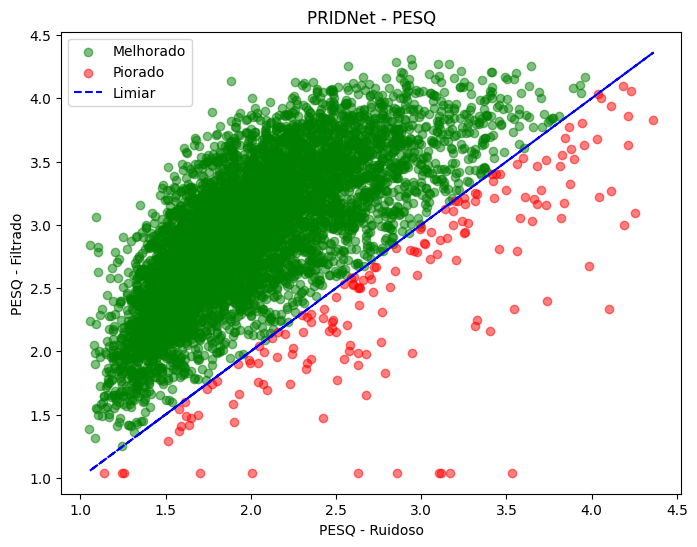

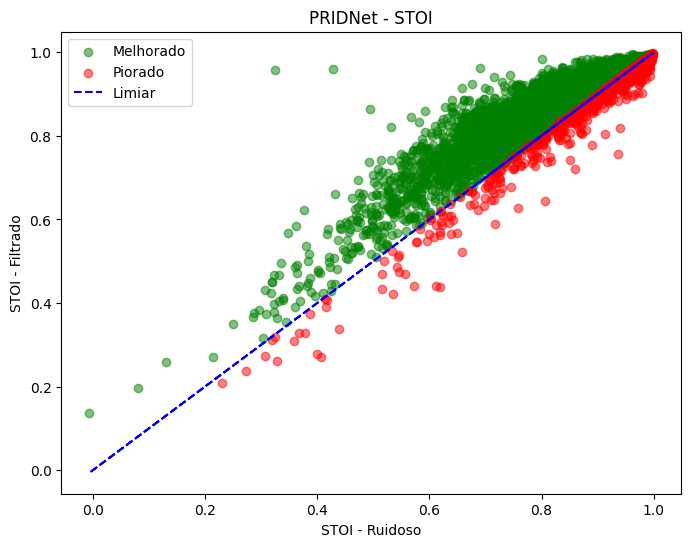

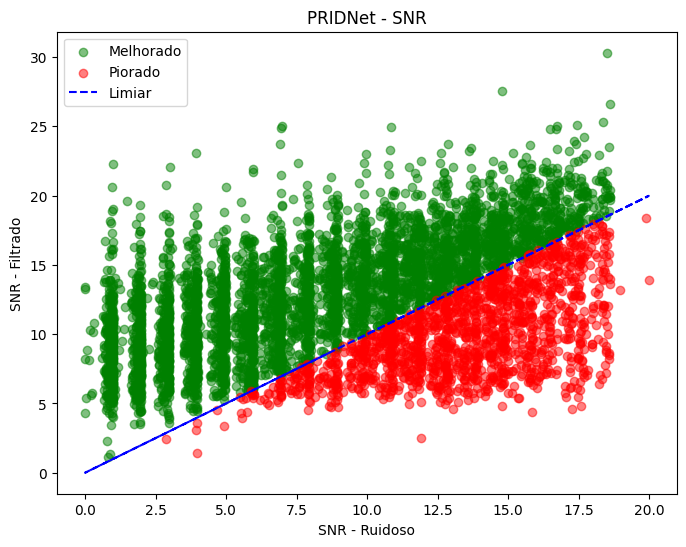

In [8]:
performance(df, 'PRIDNet', snr_lte=20.)